In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Imported required libraries

In [3]:
census = pd.read_csv('D:\DataTrained Projects\Evaluation Projects\Week 2/census_income.csv')
census

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We can see that size of all columns is same, so there might me no missing values.

Most of the columns are in object datatype, so we need to change their datatype using label encoding.

<AxesSubplot:xlabel='count', ylabel='Workclass'>

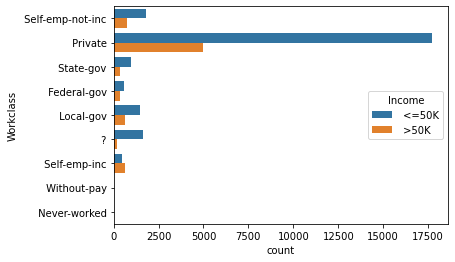

In [5]:
sns.countplot(y='Workclass',hue='Income',data=census)

Among all the employees, Private employees make more income in both lessthan $50k and more than $50k

<AxesSubplot:xlabel='count', ylabel='Education'>

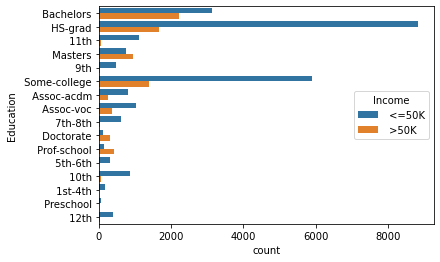

In [6]:
sns.countplot(y='Education',hue='Income',data=census)

Employees with bachelors degree are more with income greater than $50k

Employees with HS graduation are more with income less than $50k

<AxesSubplot:xlabel='count', ylabel='Marital_status'>

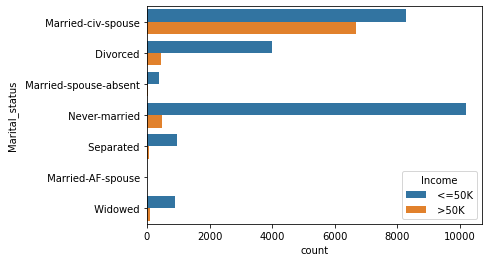

In [7]:
sns.countplot(y='Marital_status',hue='Income',data=census)

Employees who married-civ-spouse are more with income greaterthan $50k

Never married people are more with income lessthan $50K

<AxesSubplot:xlabel='count', ylabel='Occupation'>

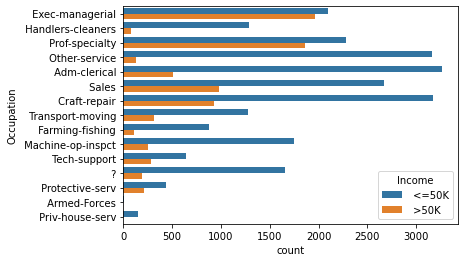

In [8]:
sns.countplot(y='Occupation',hue='Income',data=census)

Executive-Managerial employees are more in number who makes income of more than $50k.

Admin-clerical employees are more in  number who makes income lessthan $50k

<AxesSubplot:xlabel='count', ylabel='Relationship'>

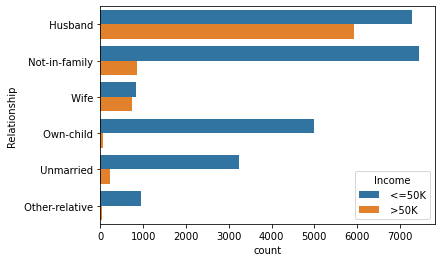

In [9]:
sns.countplot(y='Relationship',hue='Income',data=census)

Husbands are more in number who makes income more than $50K

<AxesSubplot:xlabel='count', ylabel='Race'>

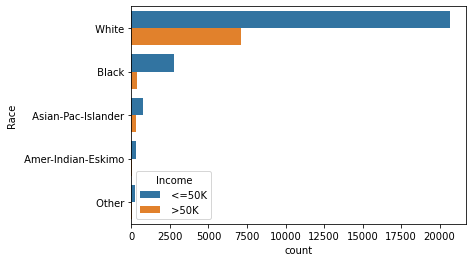

In [10]:
sns.countplot(y='Race',hue='Income',data=census)

Among all the employees, more number of white people makes income both less than $50k and more than $50k in a year

<AxesSubplot:xlabel='count', ylabel='Sex'>

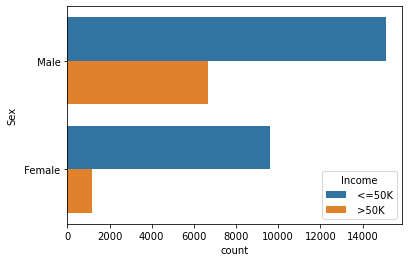

In [11]:
sns.countplot(y='Sex',hue='Income',data=census)

Among all the employees, more number of male persons makes income both less than  $50𝑘 𝑎𝑛𝑑 𝑚𝑜𝑟𝑒𝑡ℎ𝑎𝑛 50k in a year

<AxesSubplot:xlabel='count', ylabel='Native_country'>

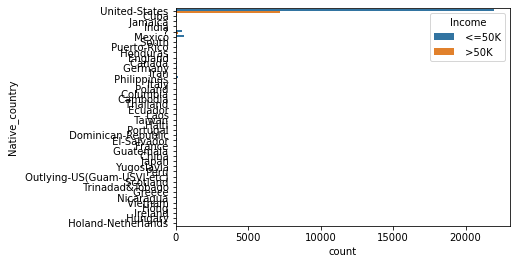

In [12]:
sns.countplot(y='Native_country',hue='Income',data=census)

Most of the data is taken from United-States

<AxesSubplot:xlabel='Age', ylabel='Income'>

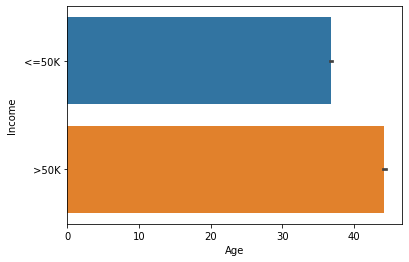

In [13]:
sns.barplot(x='Age',y='Income',data=census)

People with age above 35 are more in number who makes income of more than $50K

<AxesSubplot:xlabel='Fnlwgt', ylabel='Income'>

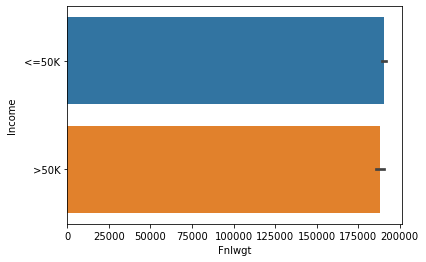

In [14]:
sns.barplot(x='Fnlwgt',y='Income',data=census)

As fnlwgt is sampling weight we can see that data is almost equally distributed

<AxesSubplot:xlabel='Education_num', ylabel='Income'>

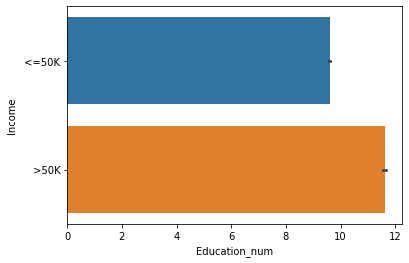

In [15]:
sns.barplot(x='Education_num',y='Income',data=census)

People who studied for more than 9years are having more chances to make $50k per year 

<AxesSubplot:xlabel='Capital_gain', ylabel='Income'>

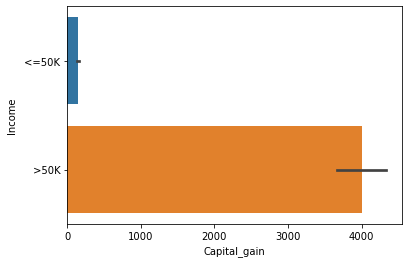

In [16]:
sns.barplot(x='Capital_gain',y='Income',data=census)

<AxesSubplot:xlabel='Capital_loss', ylabel='Income'>

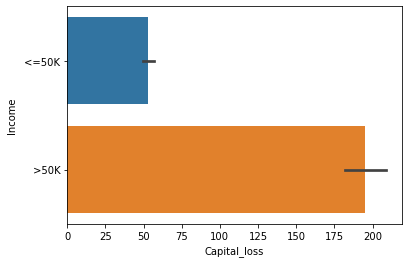

In [17]:
sns.barplot(x='Capital_loss',y='Income',data=census)

<AxesSubplot:xlabel='Hours_per_week', ylabel='Income'>

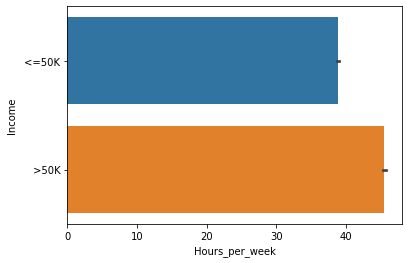

In [18]:
sns.barplot(x='Hours_per_week',y='Income',data=census)

People who work for more than 38 hours per week are having more chances to fall under category with income greater than $50k

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
census['Workclass'] = le.fit_transform(census['Workclass'])
census['Education'] = le.fit_transform(census['Education'])
census['Marital_status'] = le.fit_transform(census['Marital_status'])
census['Occupation'] = le.fit_transform(census['Occupation'])
census['Relationship'] = le.fit_transform(census['Relationship'])
census['Race'] = le.fit_transform(census['Race'])
census['Sex'] = le.fit_transform(census['Sex'])
census['Native_country'] = le.fit_transform(census['Native_country'])
census['Income'] = le.fit_transform(census['Income'])

In [20]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
 14  Income          32560 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


Converted columns with object datatype to int

In [21]:
census.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


We can see that capital_gain and capital_gain are having difference between 50% quartile and mean values, so there is a chance to have outliers in those columns

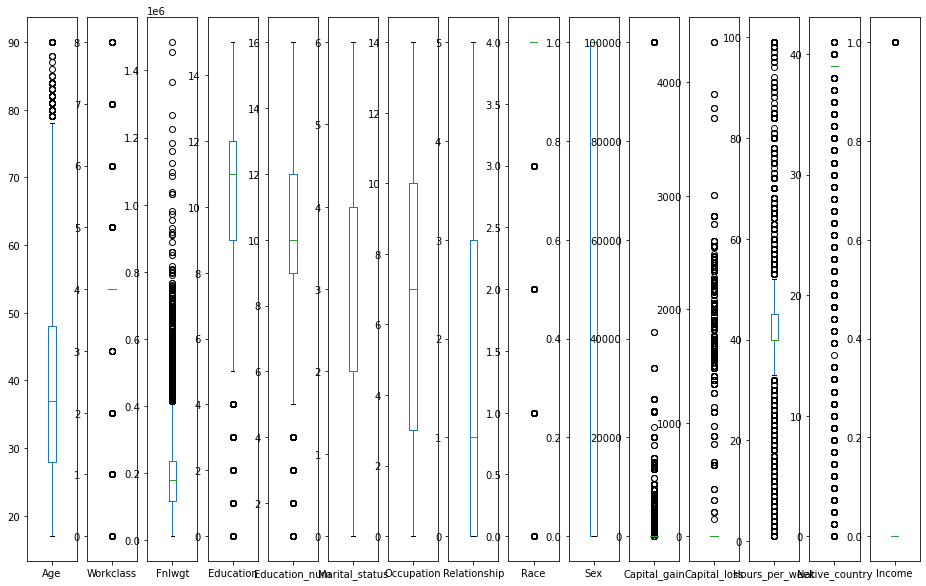

In [22]:
census.plot(kind='box',subplots=True,figsize=[16,10])
plt.show()

We can see that data is evenly distributed in all the columns except capital_gain and capital_loss as there are some outliers in those columns.


### Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [23]:
census['Education'].value_counts()

11    10501
15     7291
9      5354
12     1723
8      1382
1      1175
7      1067
0       933
5       646
14      576
6       514
2       433
10      413
4       333
3       168
13       51
Name: Education, dtype: int64

In [24]:
census['Education_num'].value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

We can see that education and education_num are having almost same data

Education tells the highest education qualification a person is having

Education_num gives the number of years a person spent on education, so we can drop one of them

fnlwgt description tells us that it gives information about sampling weight, so it will not create impact on model building, so we can drop fnlwgt

In [25]:
census.drop('Education',inplace=True,axis=1)
census.drop('Fnlwgt',inplace=True,axis=1)

In [26]:
corr_mat = census.corr()

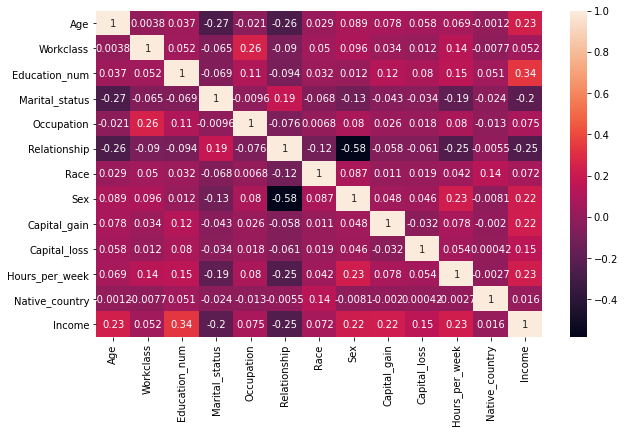

In [27]:
plt.figure(figsize=[10,6])
sns.heatmap(corr_mat,annot=True)
plt.title = ('Correlation Matrix')
plt.show()

In [28]:
corr_target = census.corrwith(census['Income'], axis=0)
corr_target

Age               0.234039
Workclass         0.051645
Education_num     0.335182
Marital_status   -0.199295
Occupation        0.075448
Relationship     -0.250924
Race              0.071853
Sex               0.215995
Capital_gain      0.223333
Capital_loss      0.150523
Hours_per_week    0.229690
Native_country    0.015845
Income            1.000000
dtype: float64

Every column is having some relation with target column after removing those tho columns

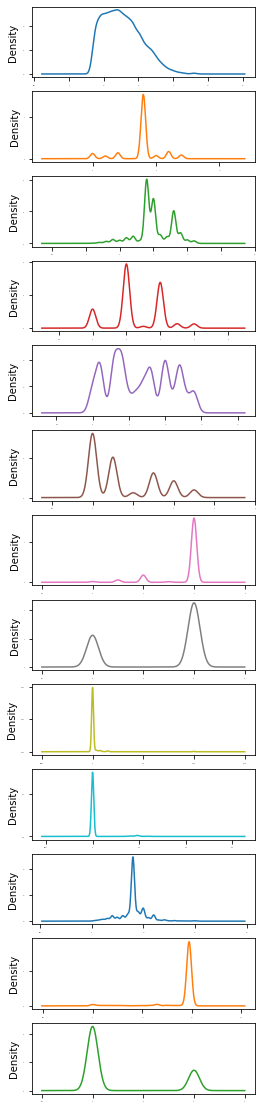

In [29]:
census.plot(kind='density',subplots=True, sharex=False, legend=False, fontsize=1, figsize=[4,20])
plt.show()

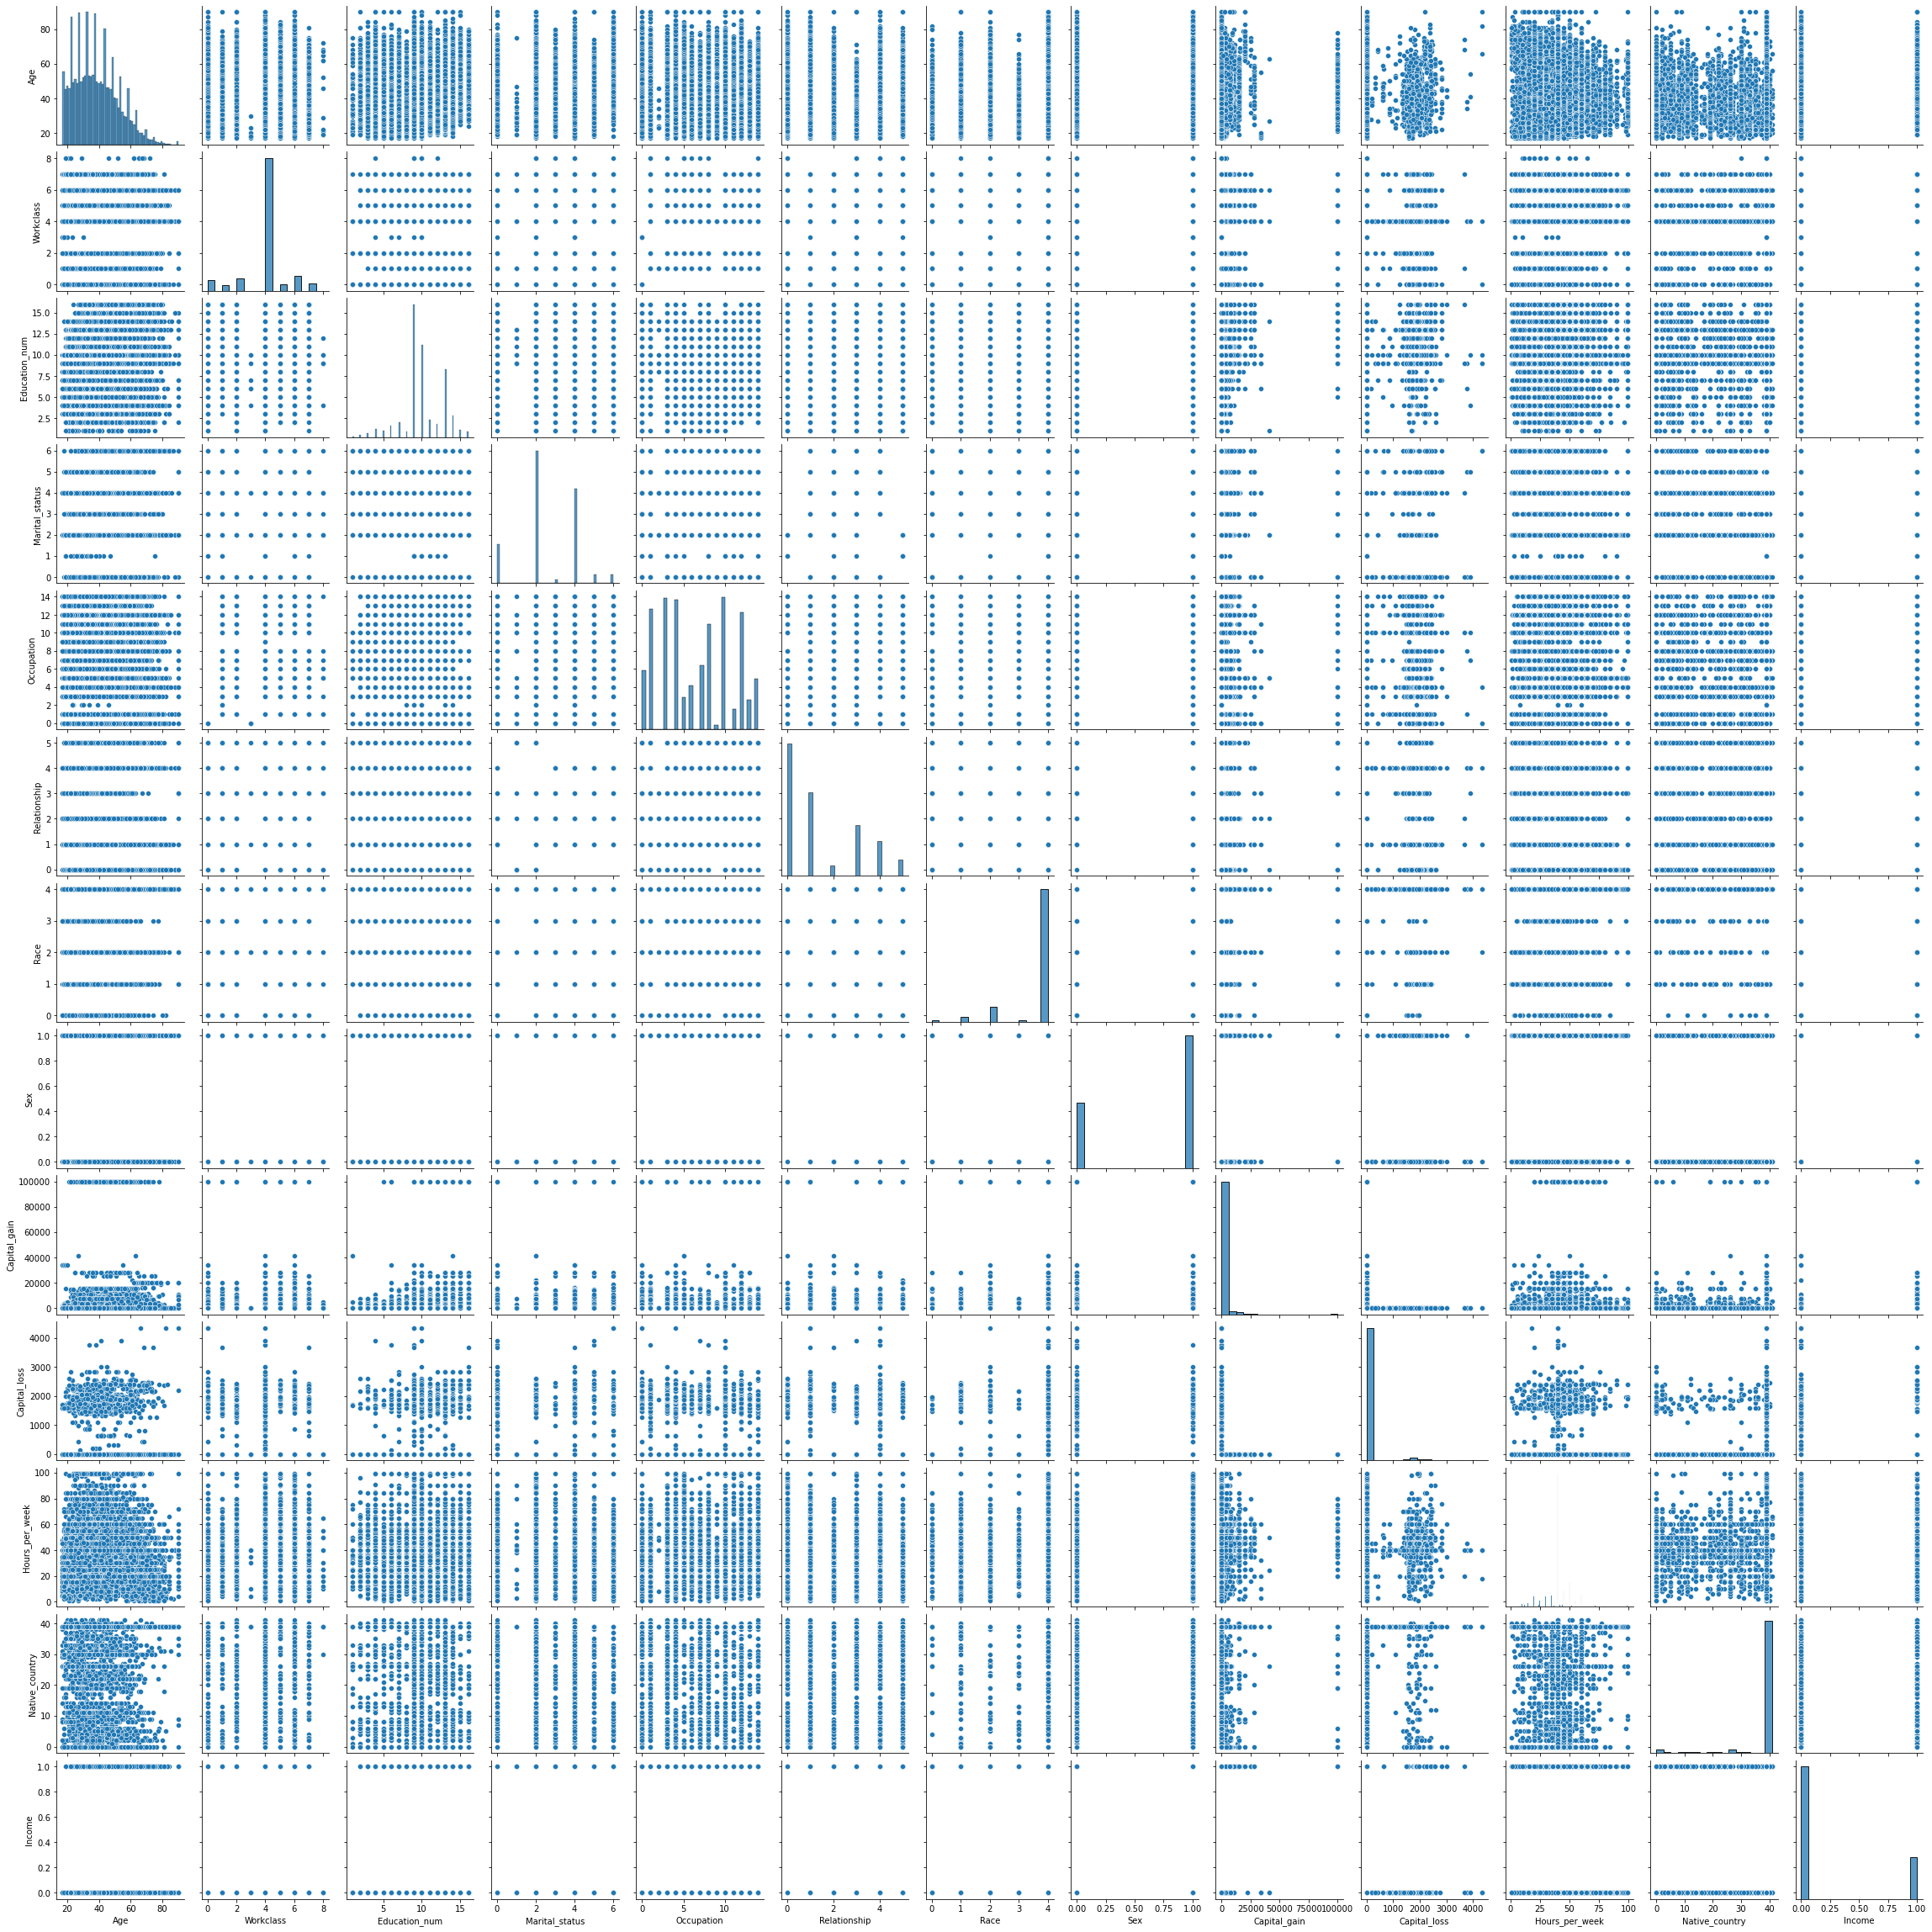

In [30]:
sns.pairplot(census)
plt.show()

Density plot and pairplot tell us that there is some skewness in few parts of data, so we use power transform to remove skewness to some extent

In [31]:
x = census.drop('Income',axis=1)
y = census['Income']

In [32]:
x.skew()

Age                0.558738
Workclass         -0.752280
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
dtype: float64

In [33]:
from sklearn.preprocessing import power_transform
census_new = power_transform(x)
census_new = pd.DataFrame(census_new,columns = x.columns)

In [34]:
census_new.skew()

Age              -0.013897
Workclass         0.061629
Education_num     0.023885
Marital_status   -0.114201
Occupation       -0.187152
Relationship      0.122917
Race             -2.010817
Sex              -0.719244
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.229556
Native_country   -2.725467
dtype: float64

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=15)

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_predict =lr.predict(x_test)
lr_accuracy = accuracy_score(y_test, lr_predict)
print(lr_accuracy)

0.8141277641277641


In [37]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_predict = gnb.predict(x_test)
gnb_accuracy_score = accuracy_score(y_test, gnb_predict)
print(gnb_accuracy_score)

0.8045454545454546


In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)
dt_accuracy_score = accuracy_score(y_test,dt_predict)
print(dt_accuracy_score)

0.8606879606879607


In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10)
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)
rf_accuracy_score = accuracy_score(y_test,rf_predict)
print(rf_accuracy_score)

0.8614250614250615


In [40]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr, x, y, cv=6)
print('Cross validation score of Logistic Regression : ',scr.mean())

Cross validation score of Logistic Regression :  0.8045763863376867


In [41]:
scr=cross_val_score(gnb, x, y, cv=6)
print('Cross validation score of Naive Bayes : ',scr.mean())

Cross validation score of Naive Bayes :  0.7994780797880424


In [42]:
scr=cross_val_score(dt, x, y, cv=6)
print('Cross validation score of Decision Tree : ',scr.mean())

Cross validation score of Decision Tree :  0.8550064677997932


In [43]:
scr=cross_val_score(rf, x, y, cv=6)
print('Cross validation score of Random Forest Classifier : ',scr.mean())

Cross validation score of Random Forest Classifier :  0.8595825292589353


From above cross validation, we can observe that Random Forest Classifier  is having least difference between accuracy score and cross validation.

So, Random Forest Classifier with accuracy score of 86.14% is the best model

In [45]:
import joblib
joblib.dump(rf,'Income_Census.pkl')

['Income_Census.pkl']